# Startup-Acquisition-Status-Prediction

## Data preprocessing

In [1]:
#import necessary libraries  
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv("companies.csv")

In [3]:
company.shape

(196553, 44)

In [4]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [5]:
company.tail()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN
196552,c:9998,196552,Company,9998,NaN,Closet Couture,closet couture,/company/closet-couture,ecommerce,operating,...,2006-07-01,2008-09-10,2.0,1.0,NaN,2008-08-24 16:46:13,2013-03-23 12:01:50,34.035633,-118.515590,NaN


In [6]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [8]:
#columns in dataset
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information
    2. Remove noise or unreliable data (missing values and outliers)
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' ,'state_code' as they provide too much of granularity.    

In [9]:
company.drop(['region','city','state_code'], axis=1,inplace=True)

#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [10]:
company.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1,inplace=True)

#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [11]:
company.drop([ 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1,inplace=True)

In [12]:
# Delete duplicate values if found any.
company.duplicated().any()

True

In [13]:
# Since, there are duplicate values in the dataset let's see how of duplicate values are present.
company.duplicated().sum()

87089

In [14]:
# Let's delete all the duplicate values
company.drop_duplicates(inplace=True)

In [15]:
# check if any left
company.duplicated().any()

False

#### 1.e. Delete those which has more than 98% of null values.

In [16]:
# # Since we can see only nan values so let's check how much of ros has nan values.
percent_missing = company. isnull(). sum() * 100 / len(company)
print("percentage of nan in each columns:")
percent_missing.sort_values()

percentage of nan in each columns:


status                  0.000000
category_code          11.172623
country_code           22.719798
founded_at             24.586165
lat                    25.910802
lng                    25.910802
relationships          31.428598
milestones             48.740225
last_milestone_at      48.740225
first_milestone_at     48.740225
funding_rounds         71.067200
last_funding_at        71.248995
first_funding_at       71.248995
funding_total_usd      74.546883
closed_at              97.607433
investment_rounds      97.943616
last_investment_at     97.947270
first_investment_at    97.947270
ROI                    99.336768
dtype: float64

In [17]:
# # Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
company.drop(['first_investment_at','last_investment_at','investment_rounds','ROI'], axis=1,inplace=True)

#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [18]:
#lets check number of missing values in each rows
company.isna().sum()

category_code          12230
status                     0
founded_at             26913
closed_at             106845
country_code           24870
first_funding_at       77992
last_funding_at        77992
funding_rounds         77793
funding_total_usd      81602
first_milestone_at     53353
last_milestone_at      53353
milestones             53353
relationships          34403
lat                    28363
lng                    28363
dtype: int64

In [19]:
#Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
company.dropna(subset=['status', 'country_code', 'category_code','founded_at'],inplace=True)

In [20]:
# Since we can see only nan values so et's check how much of rows has nan values.
company.isna().sum()

category_code             0
status                    0
founded_at                0
closed_at             61924
country_code              0
first_funding_at      40836
last_funding_at       40836
funding_rounds        40696
funding_total_usd     43118
first_milestone_at    28341
last_milestone_at     28341
milestones            28341
relationships         15290
lat                    2374
lng                    2374
dtype: int64

In [21]:
company.shape

(63585, 15)

#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

count    2.046700e+04
mean     1.582132e+07
std      6.990693e+07
min      2.910000e+02
25%      5.110380e+05
50%      2.725875e+06
75%      1.200000e+07
max      5.700000e+09
Name: funding_total_usd, dtype: float64

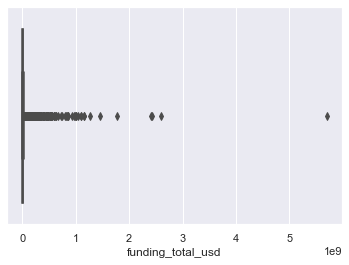

In [22]:
#'funding_total_usd' 
#check outliers for funding_total_usd column
sns.boxplot(x=company["funding_total_usd"])
company.funding_total_usd.describe()

<AxesSubplot:xlabel='funding_rounds'>

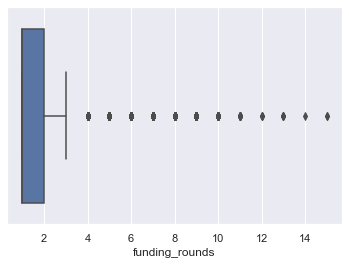

In [23]:
# 'funding_rounds'
#check outliers for funding_rounds column
sns.boxplot(x=company["funding_rounds"])

### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming 

#### 2.b.1. Find the IQR

In [24]:
# For funding_total_usd
#Type your code here!
Q1_FTU = company.funding_total_usd.quantile(0.25)
Q3_FTU = company.funding_total_usd.quantile(0.75)
Q1_FTU, Q3_FTU
IQR_FTU = Q3_FTU - Q1_FTU
print(f"IQR of funding_total_usd is: {IQR_FTU}\n")

# For funding_rounds
#Type your code here!
Q1_FR = company.funding_rounds.quantile(0.25)
Q3_FR = company.funding_rounds.quantile(0.75)
Q1_FR, Q3_FR
IQR_FR = Q3_FR - Q1_FR
print(f"IQR of funding_rounds is: {IQR_FR}")

IQR of funding_total_usd is: 11488962.0

IQR of funding_rounds is: 1.0


#### 2.b.1. Find the Upper and Lower limit

In [25]:
# For funding_total_usd
lower_limit_FTU = Q1_FTU - 1.5*IQR_FTU
upper_limit_FTU = Q3_FTU + 1.5*IQR_FTU
print("funding_total_usd")
print(f"lower limit is: {lower_limit_FTU}")
print(f"upper limit is: {upper_limit_FTU}\n")


# For funding_rounds
lower_limit_FR = Q1_FR - 1.5*IQR_FR
upper_limit_FR = Q3_FR + 1.5*IQR_FR
print("funding_total_usd")
print(f"lower limit is: {lower_limit_FR}")
print(f"upper limit is: {upper_limit_FR}")

funding_total_usd
lower limit is: -16722405.0
upper limit is: 29233443.0

funding_total_usd
lower limit is: -0.5
upper limit is: 3.5


#### 2.b.1.  Find outliers

In [26]:
# For funding_total_usd
funding_total_usd_outliers=company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)]
print(funding_total_usd_outliers.shape)

# For funding_rounds
funding_rounds_outliers=company[(company.funding_rounds<lower_limit_FR)|(company.funding_rounds>upper_limit_FR)]
print(funding_rounds_outliers.shape)

(2561, 15)
(2182, 15)


#### 2.b.1. Drop the outliers

In [27]:
# For funding_total_usd
company.drop(company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)].index,inplace=True)


# For funding_rounds
company.drop(company[(company.funding_rounds<lower_limit_FR)|(company.funding_rounds>upper_limit_FR)].index,inplace=True)
company.shape

(59987, 15)

<AxesSubplot:xlabel='funding_total_usd'>

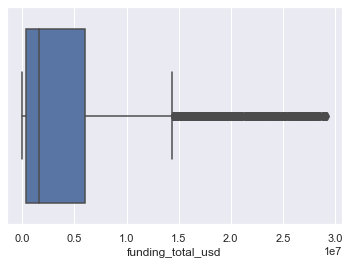

In [28]:
#'funding_total_usd' 
#check outliers for funding_total_usd column
sns.boxplot(x=company["funding_total_usd"])


<AxesSubplot:xlabel='funding_rounds'>

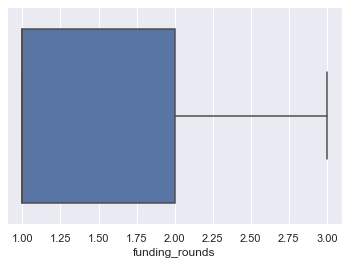

In [29]:
# 'funding_rounds'
#check outliers for funding_rounds column
sns.boxplot(x=company["funding_rounds"])

<AxesSubplot:xlabel='relationships'>

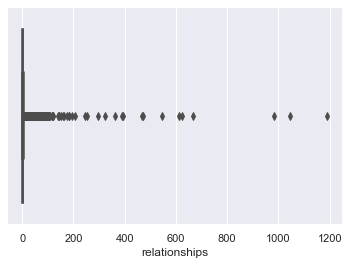

In [30]:
sns.boxplot(x=company["relationships"])

In [31]:
Q1_relationships = company.relationships.quantile(0.25)
Q3_relationships = company.relationships.quantile(0.75)
Q1_relationships, Q3_relationships
IQR_relationships = Q3_relationships - Q1_relationships
print(f"IQR of relationships is: {IQR_relationships}")

IQR of relationships is: 3.0


In [32]:
lower_limit_relationships = Q1_relationships - 1.5*IQR_relationships
upper_limit_relationships = Q3_relationships + 1.5*IQR_relationships
print(f"lower limit of relationships is: {lower_limit_relationships} and upper limit is: {upper_limit_relationships}")

lower limit of relationships is: -3.5 and upper limit is: 8.5


In [33]:
#check outliers for relationships column
company.relationships_outliers=company[(company.relationships<lower_limit_relationships)&(company.relationships>upper_limit_relationships)]
print(company.shape)
#Drop the outliers
company.drop(company[(company.relationships<lower_limit_relationships)|(company.relationships>upper_limit_relationships)].index,inplace=True)
print(company.shape)

(59987, 15)
(56580, 15)


1.0    13633
2.0    10701
3.0     6931
4.0     4164
5.0     2532
6.0     1661
7.0     1075
8.0      767
Name: relationships, dtype: int64

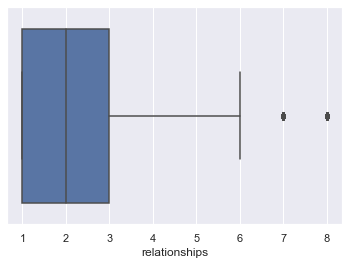

In [34]:
sns.boxplot(x=company["relationships"])
company.relationships.value_counts()

In [35]:
company.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng'],
      dtype='object')

In [36]:
company.dtypes

category_code          object
status                 object
founded_at             object
closed_at              object
country_code           object
first_funding_at       object
last_funding_at        object
funding_rounds        float64
funding_total_usd     float64
first_milestone_at     object
last_milestone_at      object
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

In [37]:
company.relationships.value_counts()

1.0    13633
2.0    10701
3.0     6931
4.0     4164
5.0     2532
6.0     1661
7.0     1075
8.0      767
Name: relationships, dtype: int64

#### 2.c. Delete contradictory (mutually opposed or inconsistent data).

In [38]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [39]:
# For founded_at
company['founded_at']=pd.to_datetime(company['founded_at'], format='%Y-%m-%d').dt.year

# closed_at
company['closed_at']=pd.to_datetime(company['closed_at'], format='%Y-%m-%d').dt.year

# first_funding_at
company['first_funding_at']=pd.to_datetime(company['first_funding_at'], format='%Y-%m-%d').dt.year

# last_funding_at
company['last_funding_at']=pd.to_datetime(company['last_funding_at'], format='%Y-%m-%d').dt.year

# # first_milestone_at
company['first_milestone_at']=pd.to_datetime(company['first_milestone_at'], format='%Y-%m-%d').dt.year


# # last_milestone_at
company['last_milestone_at']=pd.to_datetime(company['last_milestone_at'], format='%Y-%m-%d').dt.year

company.dtypes

category_code          object
status                 object
founded_at              int64
closed_at             float64
country_code           object
first_funding_at      float64
last_funding_at       float64
funding_rounds        float64
funding_total_usd     float64
first_milestone_at    float64
last_milestone_at     float64
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

 #### 1.b. Generalize the categorical data i.e. category_code and  country_code 

In [40]:
# 1. category_code
company.category_code.unique()

array(['advertising', 'cleantech', 'games_video', 'software', 'mobile',
       'network_hosting', 'consulting', 'finance', 'education', 'medical',
       'manufacturing', 'web', 'enterprise', 'other', 'ecommerce',
       'public_relations', 'hardware', 'search', 'analytics', 'news',
       'government', 'security', 'biotech', 'photo_video', 'travel',
       'health', 'semiconductor', 'social', 'legal', 'transportation',
       'hospitality', 'sports', 'nonprofit', 'fashion', 'messaging',
       'music', 'design', 'local', 'real_estate', 'automotive', 'pets',
       'nanotech'], dtype=object)

In [41]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name 
# remaining one as other.
company.category_code.value_counts()

software            10222
web                  7296
ecommerce            4695
other                4550
mobile               3474
advertising          3274
consulting           2694
games_video          2641
enterprise           2201
biotech              1899
public_relations     1486
hardware             1363
network_hosting      1182
education            1103
search                940
cleantech             744
social                604
health                579
finance               576
analytics             563
security              550
legal                 349
medical               347
semiconductor         323
travel                307
manufacturing         267
fashion               266
hospitality           257
news                  253
real_estate           214
local                 195
photo_video           188
messaging             163
sports                157
music                 155
transportation        123
nonprofit             105
design                104
automotive  

In [42]:
#category_encoading
category_others_index = company.category_code.value_counts()[15:].index
company['category_code'] = company['category_code'].replace(to_replace=category_others_index,value='other')

In [43]:
# Let's check if we've more than 15 columns
print('Unique no of category_code : ',company['category_code'].nunique())
company.category_code.value_counts()

Unique no of category_code :  15


other               12110
software            10222
web                  7296
ecommerce            4695
mobile               3474
advertising          3274
consulting           2694
games_video          2641
enterprise           2201
biotech              1899
public_relations     1486
hardware             1363
network_hosting      1182
education            1103
search                940
Name: category_code, dtype: int64

#### Let's encode 'country' column now.

In [44]:
# Since there are 161 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.
company.country_code.unique()

array(['MAR', 'IND', 'USA', 'AUS', 'FRA', 'JPN', 'NLD', 'EGY', 'ISR',
       'GBR', 'THA', 'AUT', 'IRL', 'SWE', 'DEU', 'BRA', 'FIN', 'RUS',
       'SGP', 'MEX', 'CHN', 'ESP', 'ISL', 'KOR', 'TUR', 'DNK', 'PAK',
       'HUN', 'CAN', 'POL', 'GRC', 'PRT', 'BLR', 'CSS', 'MKD', 'CHE',
       'UKR', 'ITA', 'NZL', 'CZE', 'ARG', 'VNM', 'NOR', 'HRV', 'BEN',
       'CHL', 'GHA', 'ZAF', 'MYS', 'EST', 'BEL', 'SVK', 'TWN', 'CRI',
       'HKG', 'BGD', 'BOL', 'LBN', 'LUX', 'COL', 'PHL', 'ARE', 'IDN',
       'ROM', 'ANT', 'NGA', 'LKA', 'SWZ', 'VGB', 'MLT', 'SAU', 'KEN',
       'BGR', 'PER', 'LVA', 'CYP', 'LAO', 'NPL', 'MDA', 'CMR', 'UGA',
       'TUN', 'URY', 'MUS', 'VEN', 'OMN', 'ECU', 'KWT', 'JOR', 'LTU',
       'ALB', 'SVN', 'QAT', 'PST', 'REU', 'GTM', 'PCN', 'BHS', 'GEO',
       'BWA', 'DZA', 'GRD', 'GIB', 'PAN', 'MTQ', 'PRI', 'BIH', 'DMA',
       'BHR', 'SYC', 'SLE', 'TTO', 'VCT', 'ARA', 'BRB', 'NAM', 'SLV',
       'AFG', 'BLZ', 'UZB', 'LIE', 'IRN', 'ARM', 'ATG', 'UMI', 'DOM',
       'MDV', 'MMR',

In [45]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.
country_code_others_index = company['country_code'].value_counts()[9:].index
company['country_code'] = company['country_code'].replace(to_replace=country_code_others_index,value='other')

In [46]:
# Let's check if we've more than 10 columns
print('Unique no of country_code : ',company['country_code'].nunique())
company.country_code.value_counts()

Unique no of country_code :  10


USA      31132
other    10080
GBR       4796
IND       2944
CAN       2517
DEU       1328
FRA       1198
AUS       1007
ESP        861
ISR        717
Name: country_code, dtype: int64

### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [47]:
def isClosed(row):
    if row['status'] == 'operating' or row['status'] == 'ipo':
        return 1
    else:
        return 0
company['isClosed'] = company.apply(lambda rw: isClosed(rw),axis=1)
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
5,advertising,operating,2007,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107,1
6,other,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219,1
12,advertising,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,2.0,35.686975,-105.937799,1
15,games_video,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,3.0,33.078655,-116.601964,1
20,other,operating,2003,NaN,USA,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,6.0,30.267153,-97.743061,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196543,other,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,2011.0,2011.0,1.0,5.0,38.846224,-77.306373,1
196545,software,operating,2004,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.748350,-74.323219,1
196548,ecommerce,operating,2007,NaN,USA,NaN,NaN,NaN,NaN,2013.0,2013.0,2.0,5.0,37.774929,-122.419415,1
196551,search,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,1


In [48]:
company.isClosed.value_counts()

1    52169
0     4411
Name: isClosed, dtype: int64

#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days, 
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

##### 2.b.i  Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
   - Where as if the value is 'acquired' or 'closed', let's put 0.

In [49]:
company.closed_at.unique()

array([  nan, 2010., 2012., 2013., 2009., 2011., 2008., 2006., 1963.,
       1991., 2005., 2001., 2007., 1998., 2004., 1997., 2000.])

In [50]:
company['closed_at']=(np.where((company['status']=='operating')|(company['status']=='ipo'),2021,company['closed_at']))

In [51]:
company.dropna(axis=0, subset=['closed_at'], inplace=True)

In [52]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
5,advertising,operating,2007,2021.0,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107,1
6,other,operating,2008,2021.0,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219,1
12,advertising,operating,2008,2021.0,USA,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,2.0,35.686975,-105.937799,1
15,games_video,operating,2008,2021.0,USA,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,3.0,33.078655,-116.601964,1
20,other,operating,2003,2021.0,USA,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,6.0,30.267153,-97.743061,1


##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [53]:
closed_at=company['closed_at']
founded_at=company['founded_at']

In [54]:
active_days=365*((closed_at).astype('float64')-(founded_at).astype('float64'))
company['Active_Days']=active_days
index_name=company['Active_Days'].sort_values().head(68).index
company.drop(index_name,inplace=True)
company['Active_Days']

5         5110.0
6         4745.0
12        4745.0
15        4745.0
20        6570.0
           ...  
196543    4745.0
196545    6205.0
196548    5110.0
196551    4745.0
196552    5110.0
Name: Active_Days, Length: 53592, dtype: float64

#### 2.b.iii. Then, delete the closed_at column.

In [55]:
company.drop(['closed_at'], axis=1,inplace=True)

### Let's work on target variabe now.

In [56]:
company.dtypes

category_code          object
status                 object
founded_at              int64
country_code           object
first_funding_at      float64
last_funding_at       float64
funding_rounds        float64
funding_total_usd     float64
first_milestone_at    float64
last_milestone_at     float64
milestones            float64
relationships         float64
lat                   float64
lng                   float64
isClosed                int64
Active_Days           float64
dtype: object

In [57]:
company.isna().sum()

category_code             0
status                    0
founded_at                0
country_code              0
first_funding_at      37651
last_funding_at       37651
funding_rounds        37519
funding_total_usd     39623
first_milestone_at    25966
last_milestone_at     25966
milestones            25966
relationships         14453
lat                    2182
lng                    2182
isClosed                  0
Active_Days               0
dtype: int64

In [58]:
company.shape

(53592, 16)

### Remove the null vaues with the mean value in 'Numerical Data'

In [59]:
company['first_funding_at'].fillna(int(company['first_funding_at'].mean()),inplace=True)

company['last_funding_at'].fillna(int(company['last_funding_at'].mean()),inplace=True)

company['funding_rounds'].fillna(int(company['funding_rounds'].mean()),inplace=True)

company['funding_total_usd'].fillna(int(company['funding_total_usd'].mean()),inplace=True)

company['first_milestone_at'].fillna(int(company['first_milestone_at'].mean()),inplace=True)

company['last_milestone_at'].fillna(int(company['last_milestone_at'].mean()),inplace=True)

company['milestones'].fillna(int(company['milestones'].mean()),inplace=True)

company['relationships'].fillna(int(company['relationships'].mean()),inplace=True)

company['lat'].fillna(int(company['lat'].mean()),inplace=True)

company['lng'].fillna(int(company['lng'].mean()),inplace=True)

In [60]:
company.isna().sum()

category_code         0
status                0
founded_at            0
country_code          0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
lat                   0
lng                   0
isClosed              0
Active_Days           0
dtype: int64

In [61]:
# Final null check on data
company.isnull().sum().any()

False

In [62]:
# First let's check how much of rows has nan values and drop them. 
#company.dropna(inplace=True)

In [63]:
#Finally Save cleaned Data.
#company.to_csv('Final_dataset.csv',index=False)

In [64]:
company.shape

(53592, 16)

## Exploratory Data Analysis

In [65]:
#load Dataset
#company= pd.read_csv("Final_dataset.csv")

In [66]:
company.shape

(53592, 16)

In [67]:
company.head()

,category_code,status,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,Active_Days
5,advertising,operating,2007,other,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,2.0,30.427755,-9.598107,1,5110.0
6,other,operating,2008,IND,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,2.0,22.307159,73.181219,1,4745.0
12,advertising,operating,2008,USA,2010.0,2011.0,1.0,3652912.0,2008.0,2008.0,1.0,2.0,35.686975,-105.937799,1,4745.0
15,games_video,operating,2008,USA,2010.0,2011.0,1.0,3652912.0,2008.0,2008.0,1.0,3.0,33.078655,-116.601964,1,4745.0
20,other,operating,2003,USA,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,6.0,30.267153,-97.743061,1,6570.0


In [68]:
company.columns

Index(['category_code', 'status', 'founded_at', 'country_code',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'isClosed', 'Active_Days'],
      dtype='object')

In [69]:
company.describe()

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,Active_Days
count,53592.000000,53592.000000,53592.000000,53592.000000,5.359200e+04,53592.000000,53592.000000,53592.000000,53592.000000,53592.000000,53592.000000,53592.000000,53592.000000
mean,2006.102851,2010.184953,2011.022298,1.110110,3.652912e+06,2009.283998,2009.512203,1.136140,2.422936,37.003570,-45.808216,0.973448,5344.458968
std,9.190463,1.366384,1.272814,0.378591,2.804505e+06,2.994349,2.935290,0.415158,1.481865,16.238955,70.493279,0.160773,3408.456390
min,1901.000000,1960.000000,1960.000000,1.000000,2.910000e+02,1960.000000,1960.000000,1.000000,1.000000,-50.942326,-159.485278,0.000000,365.000000
25%,2005.000000,2010.000000,2011.000000,1.000000,3.652912e+06,2009.000000,2009.000000,1.000000,2.000000,34.019454,-97.743061,1.000000,3650.000000
50%,2009.000000,2010.000000,2011.000000,1.000000,3.652912e+06,2009.000000,2009.000000,1.000000,2.000000,39.103118,-74.005973,1.000000,4380.000000
75%,2011.000000,2010.000000,2011.000000,1.000000,3.652912e+06,2011.000000,2011.000000,1.000000,3.000000,45.421530,2.352222,1.000000,5840.000000
max,2014.000000,2013.000000,2013.000000,3.000000,2.918450e+07,2014.000000,2014.000000,7.000000,8.000000,77.553604,176.165130,1.000000,43800.000000


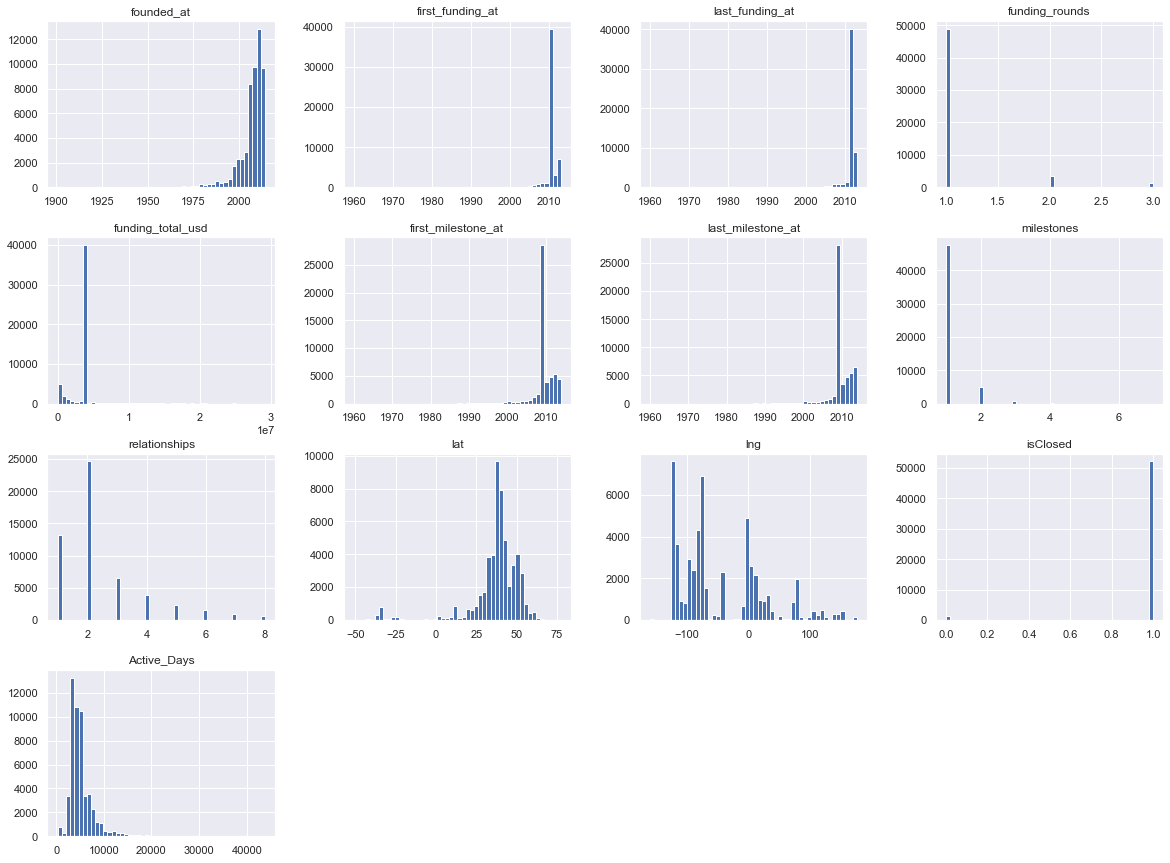

In [70]:
import matplotlib.pyplot as plt
company.hist(bins=50, figsize=(20,15))
plt.show()

### Univariate Analysis

In [71]:
company.isClosed.value_counts()

1    52169
0     1423
Name: isClosed, dtype: int64

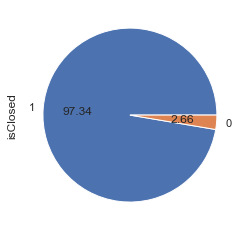

In [72]:
company['isClosed'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

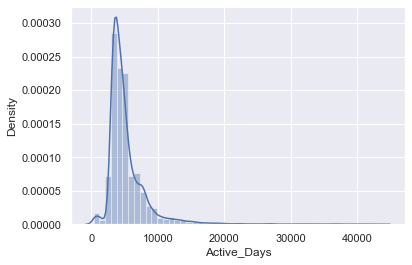

In [73]:
sns.distplot(company['Active_Days']) 
plt.show()

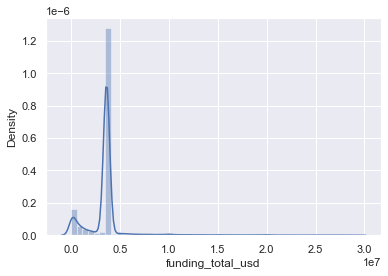

In [74]:
sns.distplot(company['funding_total_usd']) 
plt.show()

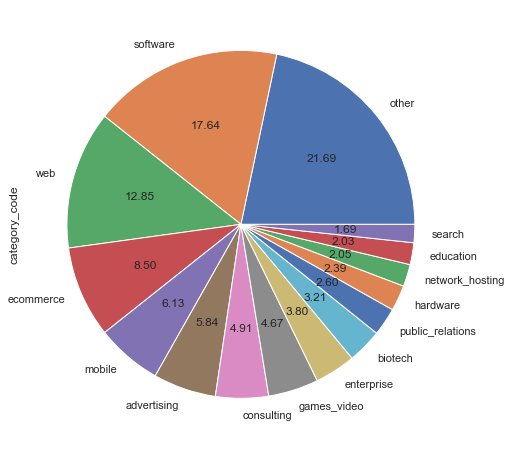

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))
company['category_code'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

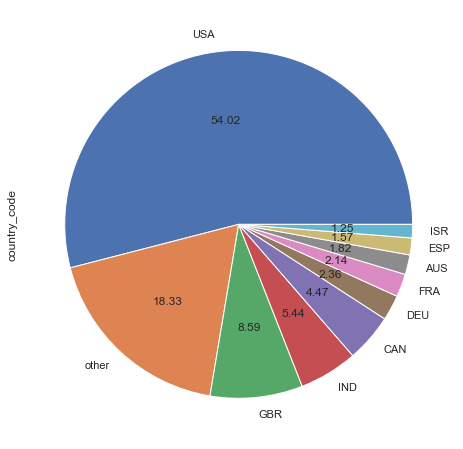

In [76]:
fig, ax = plt.subplots(figsize=(8, 8))
company['country_code'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

array([[<AxesSubplot:xlabel='isClosed', ylabel='isClosed'>,
        <AxesSubplot:xlabel='Active_Days', ylabel='isClosed'>,
        <AxesSubplot:xlabel='milestones', ylabel='isClosed'>,
        <AxesSubplot:xlabel='relationships', ylabel='isClosed'>,
        <AxesSubplot:xlabel='funding_rounds', ylabel='isClosed'>],
       [<AxesSubplot:xlabel='isClosed', ylabel='Active_Days'>,
        <AxesSubplot:xlabel='Active_Days', ylabel='Active_Days'>,
        <AxesSubplot:xlabel='milestones', ylabel='Active_Days'>,
        <AxesSubplot:xlabel='relationships', ylabel='Active_Days'>,
        <AxesSubplot:xlabel='funding_rounds', ylabel='Active_Days'>],
       [<AxesSubplot:xlabel='isClosed', ylabel='milestones'>,
        <AxesSubplot:xlabel='Active_Days', ylabel='milestones'>,
        <AxesSubplot:xlabel='milestones', ylabel='milestones'>,
        <AxesSubplot:xlabel='relationships', ylabel='milestones'>,
        <AxesSubplot:xlabel='funding_rounds', ylabel='milestones'>],
       [<AxesSubplot:xla

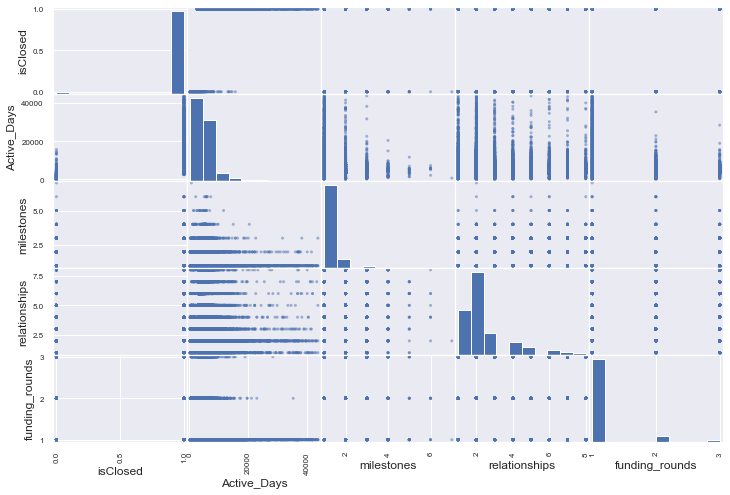

In [77]:
from pandas.plotting import scatter_matrix
attributes = ["isClosed", "Active_Days", "milestones",
 "relationships","funding_rounds"]
scatter_matrix(company[attributes], figsize=(12, 8))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='lng', ylabel='lat'>

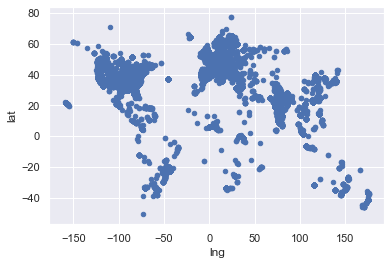

In [78]:
company.plot(kind="scatter", x="lng", y="lat")

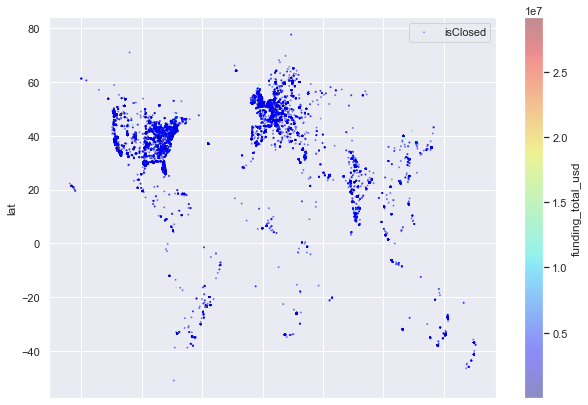

In [79]:
company.plot(kind="scatter", x="lng", y="lat", alpha=0.4,
 s=company["isClosed"], label="isClosed", figsize=(10,7),
 c="funding_total_usd", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


<AxesSubplot:xlabel='Active_Days', ylabel='funding_total_usd'>

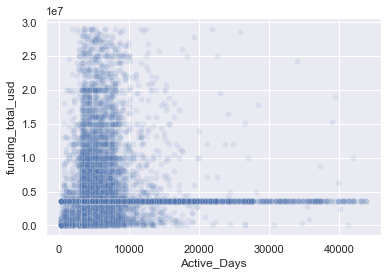

In [80]:
# bivariate 
sns.scatterplot(company["Active_Days"], company["funding_total_usd"], alpha=0.1)

<AxesSubplot:xlabel='funding_total_usd', ylabel='milestones'>

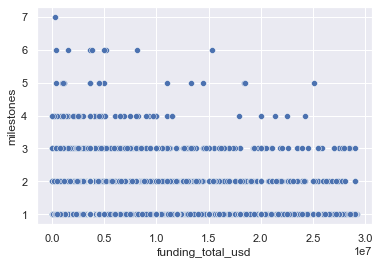

In [81]:
sns.scatterplot(company["funding_total_usd"], company["milestones"])

<AxesSubplot:xlabel='funding_total_usd', ylabel='milestones'>

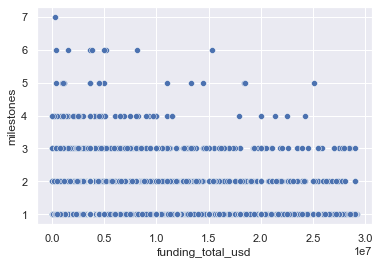

In [82]:
sns.scatterplot(company["funding_total_usd"], company["milestones"])

## Feature Engineeering


    Step1 : Handling missing values
    Step2 : Handling outliers
    Step3 : Handling imbalanced data
    Step4 : Handling corelation
    Step5 : Feature scaling (if needed)

### Step1 : Handling missing values

In [83]:
#check for missing values
company.isnull().sum().any()

False

### Step2 : Handling outliers

### Step 3: Handling imbanced data

In [84]:
# y=company["isClosed"].copy()
# X=company.drop('isClosed',axis=1).copy()

In [85]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, random_state=42)

In [86]:
# company['isClosed'].value_counts()

In [87]:
# sns.countplot(company['isClosed'])

In [88]:
# from imblearn.over_sampling import RandomOverSampler
# os=RandomOverSampler(sampling_strategy='all')

In [89]:
# X_train_res,y_train_res=os.fit_resample(X_train,y_train)

In [90]:
# from collections import Counter
# print('Resampled dataset shape %s' % Counter(y_train_res))

In [91]:
# ax=  y_train_res.value_counts().plot.pie(autopct='%.2f')

In [92]:
company

,category_code,status,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,Active_Days
5,advertising,operating,2007,other,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,2.0,30.427755,-9.598107,1,5110.0
6,other,operating,2008,IND,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,2.0,22.307159,73.181219,1,4745.0
12,advertising,operating,2008,USA,2010.0,2011.0,1.0,3652912.0,2008.0,2008.0,1.0,2.0,35.686975,-105.937799,1,4745.0
15,games_video,operating,2008,USA,2010.0,2011.0,1.0,3652912.0,2008.0,2008.0,1.0,3.0,33.078655,-116.601964,1,4745.0
20,other,operating,2003,USA,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,6.0,30.267153,-97.743061,1,6570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196543,other,operating,2008,USA,2010.0,2011.0,1.0,3652912.0,2011.0,2011.0,1.0,5.0,38.846224,-77.306373,1,4745.0
196545,software,operating,2004,USA,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,2.0,40.748350,-74.323219,1,6205.0
196548,ecommerce,operating,2007,USA,2010.0,2011.0,1.0,3652912.0,2013.0,2013.0,2.0,5.0,37.774929,-122.419415,1,5110.0
196551,search,operating,2008,USA,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,1.0,34.052234,-118.243685,1,4745.0


# looking for corelation

In [93]:
corr_matrix = company.corr()

In [94]:
corr_matrix["isClosed"].sort_values(ascending=False)

isClosed              1.000000
last_funding_at       0.214081
Active_Days           0.179535
first_funding_at      0.156054
lng                   0.030932
first_milestone_at    0.016711
funding_total_usd     0.015043
last_milestone_at     0.004621
lat                  -0.013143
founded_at           -0.014556
relationships        -0.030323
funding_rounds       -0.052826
milestones           -0.063817
Name: isClosed, dtype: float64

### Step 4: Handling corelation

In [95]:
#Using Pearson Correlation
# plt.figure(figsize=(20,20))
# cor = company.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

In [96]:
# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr

In [97]:
# corr_features = correlation(company, 0.7)
# len(set(corr_features))

In [98]:
# corr_features

In [99]:
# company.drop(corr_features,axis=1)

### hot-code encoading

In [100]:
# One-hot encoding to category_code
# dummies = pd.get_dummies(company.category_code, prefix='category')
# dummies

In [101]:
# Concatenate category with company dataset
# company = pd.concat([company,dummies],axis='columns')
# company

In [102]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(['category_code'], axis=1,inplace=True)

In [103]:
# One-hot encoding to category_code
# dummies = pd.get_dummies(company.country_code, prefix='country')
# dummies

In [104]:
# Concatenate category with company dataset
# company = pd.concat([company,dummies],axis='columns')
# company

In [105]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(['country_code'], axis=1,inplace=True)

In [106]:
company.drop(['status'], axis=1,inplace=True)

#### min max scaler

In [107]:
from sklearn.preprocessing import MinMaxScaler

X = company.drop('isClosed', axis=1) # features
y = company.isClosed
# use the iris dataset
#X, y = load_iris(return_X_y=True)
#print(X.shape)
# (150, 4) # 150 samples (rows) with 4 features/variables (columns)
# build the scaler model
scaler = MinMaxScaler()
# fit using the train set
scaler.fit(X)
# transform the test test
X_scaled = scaler.transform(X)
# Verify minimum value of all features
X_scaled.min(axis=0)
# array([0., 0., 0., 0.])
# Verify maximum value of all features
X_scaled.max(axis=0)
# array([1., 1., 1., 1.])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [108]:
company

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,Active_Days
5,2007,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,2.0,30.427755,-9.598107,1,5110.0
6,2008,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,2.0,22.307159,73.181219,1,4745.0
12,2008,2010.0,2011.0,1.0,3652912.0,2008.0,2008.0,1.0,2.0,35.686975,-105.937799,1,4745.0
15,2008,2010.0,2011.0,1.0,3652912.0,2008.0,2008.0,1.0,3.0,33.078655,-116.601964,1,4745.0
20,2003,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,6.0,30.267153,-97.743061,1,6570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196543,2008,2010.0,2011.0,1.0,3652912.0,2011.0,2011.0,1.0,5.0,38.846224,-77.306373,1,4745.0
196545,2004,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,2.0,40.748350,-74.323219,1,6205.0
196548,2007,2010.0,2011.0,1.0,3652912.0,2013.0,2013.0,2.0,5.0,37.774929,-122.419415,1,5110.0
196551,2008,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,1.0,34.052234,-118.243685,1,4745.0


In [109]:
company.columns

Index(['founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'isClosed', 'Active_Days'],
      dtype='object')

## Building Your Model

### Logistic Regression

In [110]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.2, random_state = 42)

In [111]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)

LogisticRegression()

In [112]:
# testing on training set
from sklearn.metrics import mean_absolute_error
prediction = log_reg.predict(train_X)
mean_absolute_error(train_y, prediction)

0.005831175798287967

In [113]:
#testing on tesing set
prediction = log_reg.predict(val_X)
mean_absolute_error(val_y, prediction)

0.007090213639332027

In [114]:
# #RMSE
# from sklearn.metrics import mean_squared_error
# prediction = log_reg.predict(val_X)
# lin_mse = mean_squared_error(val_y, prediction)
# lin_rmse = np.sqrt(log_reg)
# lin_rmse


### XG Boost

In [115]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [116]:
# testing on training set
from sklearn.metrics import mean_absolute_error
prediction = xgb_reg.predict(train_X)
mean_absolute_error(train_y, prediction)

9.42471222540597e-05

In [117]:
#testing on tesing set
prediction = xgb_reg.predict(val_X)
mean_absolute_error(val_y, prediction)

0.0009946729665635868

In [118]:
#K-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_reg, val_X, val_y, scoring="neg_mean_squared_error", cv=10)
xgb_reg_rmse_scores = np.sqrt(-scores)


In [119]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [120]:
display_scores(xgb_reg_rmse_scores)

Scores: [0.0205511  0.0329958  0.0431946  0.03329294 0.05062901 0.04184261
 0.01619967 0.01094537 0.03032793 0.02262939]
Mean: 0.03026084095379906
Standard deviation: 0.012067652381904754


### Random Forest

In [121]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_X, train_y)

RandomForestRegressor()

In [122]:
# testing on training set
prediction = forest_reg.predict(train_X)
mean_absolute_error(train_y, prediction)

0.0003442726191309217

In [123]:
#testing on tesing set
prediction = forest_reg.predict(val_X)
mean_absolute_error(val_y, prediction)

0.0013014273719563392

In [124]:
#K-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, val_X, val_y, scoring="neg_mean_squared_error", cv=10)
forest_reg_rmse_scores = np.sqrt(-scores)


In [125]:
display_scores(forest_reg_rmse_scores)

Scores: [0.03475393 0.04116199 0.03922762 0.04900503 0.05277646 0.03328837
 0.02958828 0.04909631 0.03781213 0.03258401]
Mean: 0.03992941394077496
Standard deviation: 0.007547998840086916


In [126]:
# Saving model to disk
import pickle 
pickle.dump(forest_reg, open('model.pkl','wb'))

In [127]:
train_X.sample(5)

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,Active_Days
11607,2002,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,1.0,42.360082,-71.058880,6935.0
60747,1972,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,2.0,38.252665,-85.758456,17885.0
28129,2012,2010.0,2011.0,1.0,3652912.0,2012.0,2012.0,1.0,2.0,46.813878,-71.207981,3285.0
45746,2008,2008.0,2008.0,1.0,5600.0,2009.0,2009.0,1.0,1.0,45.012682,-93.172023,4745.0
169556,2009,2010.0,2011.0,1.0,3652912.0,2009.0,2009.0,1.0,1.0,37.368830,-122.036350,4380.0


In [128]:
train_y.sample(5)

40716     1
48556     1
62635     1
181973    1
160896    1
Name: isClosed, dtype: int64

### Support Vector Machine.

#### Underfitting and Overfitting

In [129]:
# from sklearn.metrics import mean_absolute_error
#def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    #company_model = LogisticRegression(max_leaf_nodes=max_leaf_nodes, random_state=0)
    #model.fit(train_X, train_y)
    #preds_val = model.predict(val_X)
    #mae = mean_absolute_error(val_y, preds_val)
    #return(mae)

In [130]:
#for max_leaf_nodes in [5, 50, 500, 5000]:
    #my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    #print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

### XGBoost

In [131]:
# X = company.drop('isClosed', axis=1) # features
# y = company.isClosed #Target

In [132]:
# Separate data into training and validation sets
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [133]:
# predict = my_model.predict(X_test)
# from sklearn.metrics import mean_absolute_error
# mae = mean_absolute_error(predict, y_test)
# print("Mean Absolute Error:" , mae)

In [134]:
# accuracy_score(y_test, predict)

In [135]:
# ## Hyper Parameter Optimization
# params={
#  "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
# }

In [136]:
# ## Hyperparameter optimization using RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# import xgboost

In [137]:
# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [138]:
# classifier=xgboost.XGBClassifier()

In [139]:
# random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [140]:
# from datetime import datetime
# # Here we go
# start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search.fit(X,y)
# timer(start_time) # timing ends here for "start_time" variable

In [141]:
# random_search.best_estimator_

In [142]:
# random_search.best_params_

In [143]:
# classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
#               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
#               early_stopping_rounds=None, enable_categorical=False,
#               eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
#               importance_type=None, interaction_constraints='',
#               learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
#               max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
#                 monotone_constraints='()', n_estimators=100,
#               n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
#               reg_alpha=0, reg_lambda=1)

In [144]:
# from sklearn.model_selection import cross_val_score
# score=cross_val_score(classifier,X,y,cv=10)

In [145]:
# score

In [146]:
# score.mean()